## Export ROA & ROE of Company

In [50]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yahoo_fin.stock_info as yf_info
import yfinance as yf
from tqdm import tqdm

In [51]:
dow_list = yf_info.tickers_dow()
nasdaq_list = yf_info.tickers_nasdaq()
sp500_list = yf_info.tickers_sp500()

In [52]:
tickers = dow_list

In [53]:
all_company_info = {}
for ticker in tqdm(tickers):
    all_company_info[ticker] = yf.Ticker(ticker).info

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:55<00:00,  7.84s/it]


In [54]:
all_company_info['AAPL']

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [55]:
#pd.DataFrame(all_company_info).iloc[12:-1] 
selected_company_info = pd.DataFrame(all_company_info).iloc[[50, 1, 12, 14, 28, 32, 36, 65, 132]].T
selected_company_info.tail()

,symbol,sector,industry,profitMargins,returnOnAssets,returnOnEquity,totalRevenue,bookValue,marketCap
UNH,UNH,Healthcare,Healthcare Plans,0.05333,0.06481,0.21115,272099000320,70.343,396694552576
V,V,Financial Services,Credit Services,0.47971,0.1142,0.29637,22646999040,16.084,495479291904
VZ,VZ,Communication Services,Telecom Services,0.15045,0.06335,0.29519,132865998848,17.206,214952427520
WBA,WBA,Healthcare,Pharmaceutical Retailers,0.01565,0.02538,0.10016,146172002304,25.554,43885281280
WMT,WMT,Consumer Defensive,Discount Stores,0.01775,0.07755,0.12319,566144991232,27.927,391936704512


In [56]:
Company_ticker = "AAPL"
print("자산수익률 (ROA): %f" %(all_company_info[Company_ticker]['returnOnAssets']))
print("순이익률 (Profit Margins): %f" %(all_company_info[Company_ticker]['profitMargins']))
print("자산 회전률 (Asset Turnover Ratio): %f" %((all_company_info[Company_ticker]['returnOnAssets']/all_company_info[Company_ticker]['profitMargins'])))
print("자산 (Asset): %f" %(all_company_info[Company_ticker]['totalRevenue']/(all_company_info[Company_ticker]['returnOnAssets']/all_company_info[Company_ticker]['profitMargins'])))
print("자기자본 수익률 (ROE): %f" %(all_company_info[Company_ticker]['returnOnEquity']))
print("재무 레버리지 (DFL): %f" %(all_company_info[Company_ticker]['returnOnEquity']/all_company_info[Company_ticker]['returnOnAssets']))
print("매출 (Total Revenue): %d" %(all_company_info[Company_ticker]['totalRevenue']))
print("주당 장부가치 (Book Value): %f" %(all_company_info[Company_ticker]['bookValue']))
print("시가총액 (Market Cap): %d" %(all_company_info[Company_ticker]['marketCap']))

자산수익률 (ROA): 0.193020
순이익률 (Profit Margins): 0.250040
자산 회전률 (Asset Turnover Ratio): 0.771956
자산 (Asset): 449707996892.641174
자기자본 수익률 (ROE): 1.271250
재무 레버리지 (DFL): 6.586105
매출 (Total Revenue): 347155005440
주당 장부가치 (Book Value): 3.882000
시가총액 (Market Cap): 2376381497344


In [57]:
company_financial_info = pd.DataFrame()
company_financial_info["Ticker"] = selected_company_info['symbol']
company_financial_info["Sector"] = selected_company_info['sector']
company_financial_info["Industry"] = selected_company_info['industry']
company_financial_info["ROA [%]"] = selected_company_info['returnOnAssets'] * 100
company_financial_info["Profit Margins [%]"] = selected_company_info['profitMargins'] * 100
company_financial_info["Asset Turnover Ratio [%]"] = (selected_company_info['returnOnAssets']/selected_company_info['profitMargins'] * 100)
company_financial_info["Asset"] = selected_company_info['totalRevenue']/(selected_company_info['returnOnAssets']/selected_company_info['profitMargins'])
company_financial_info["ROE [%]"] = selected_company_info['returnOnEquity'] * 100
company_financial_info["DFL"] = selected_company_info['returnOnEquity']/selected_company_info['returnOnAssets']
company_financial_info["Total Revenue"] = selected_company_info['totalRevenue']
company_financial_info["Book Value"] = selected_company_info[['bookValue']]
company_financial_info.head()

,Ticker,Sector,Industry,ROA [%],Profit Margins [%],Asset Turnover Ratio [%],Asset,ROE [%],DFL,Total Revenue,Book Value
AAPL,AAPL,Technology,Consumer Electronics,19.302,25.004,77.195649,449707996892.641174,127.125,6.586105,347155005440,3.882
AMGN,AMGN,Healthcare,Drug Manufacturers—General,9.128001,22.547,40.484324,62947819118.669212,60.785,6.65918,25483999232,14.479
AXP,AXP,Financial Services,Credit Services,3.741,18.424,20.305037,187815470043.594757,30.154,8.060412,38136000512,32.004
BA,BA,Industrials,Aerospace & Defense,-1.613,-14.303,11.277354,546741719862.755127,NaN,NaN,61658001408,-28.474
CAT,CAT,Industrials,Farm & Heavy Construction Machinery,5.058,9.568,52.863714,86811912966.285782,28.679,5.670027,45892001792,30.747


In [58]:
print(set(company_financial_info['Sector']))

{'Communication Services', 'Financial Services', 'Basic Materials', 'Industrials', 'Technology', 'Energy', 'Consumer Cyclical', 'Consumer Defensive', 'Healthcare'}


<AxesSubplot:xlabel='DFL', ylabel='ROE [%]'>

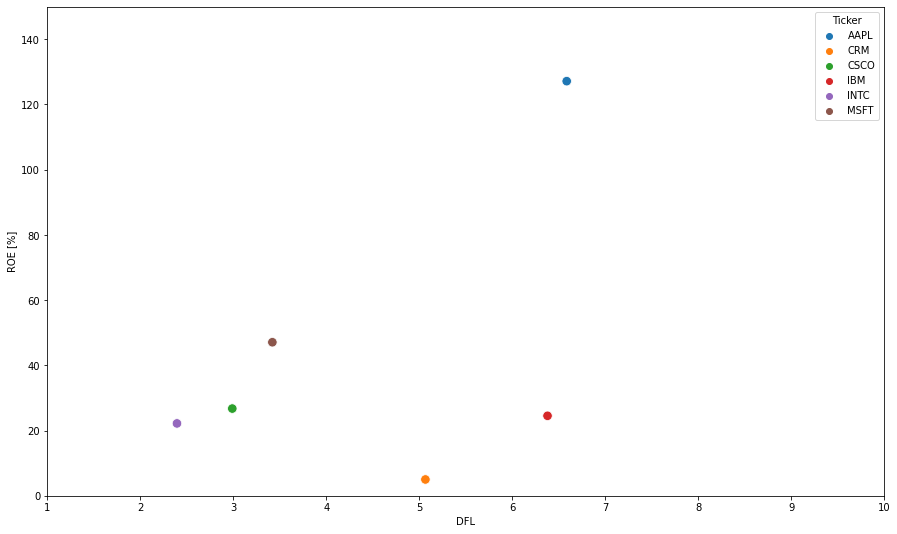

In [59]:
plot_data = company_financial_info[company_financial_info['Sector'] == 'Technology']

plt.figure(figsize = (15, 9))
plt.xlim(1, 10)
plt.ylim(0, 150)
sns.scatterplot(data = plot_data, x = 'DFL', y = 'ROE [%]', hue = 'Ticker', s = 90)

## Export and Calculate Correlation between "Stock Price" and "10yr Treasury Note Yield"

In [60]:
all_data = {}
for ticker in tqdm(tickers):
    all_data[ticker] = pdr.DataReader(ticker, 'yahoo', start = '2000-01-01')['Adj Close']

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:59<00:00,  3.98s/it]


In [61]:
dow_price = pd.DataFrame(all_data)
dow_price.pct_change()
#dow_price.rolling(window=20).mean().tail()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.088754,0.047867,-0.054135,-0.030166,0.033201,NaN,0.008751,-0.034632,0.021368,NaN,...,0.006512,-0.001606,-0.029004,-0.021677,-0.020409,0.011765,NaN,-0.026396,-0.023504,-0.033454
2000-01-04,-0.084310,-0.076465,-0.037758,-0.001556,-0.012854,NaN,-0.056102,0.000000,0.058577,NaN,...,-0.035120,-0.033780,-0.054545,-0.019242,-0.013257,-0.012791,NaN,-0.032325,-0.037199,-0.037419
2000-01-05,0.014633,0.034409,-0.025399,0.062306,0.023437,NaN,-0.003064,0.017937,0.041502,NaN,...,0.039271,0.010543,0.057692,-0.019025,-0.007678,-0.002356,NaN,0.033405,0.011363,-0.020408
2000-01-06,-0.086538,0.016632,0.020374,0.010264,0.050891,NaN,-0.016595,0.042584,-0.039848,NaN,...,0.008295,-0.033498,-0.005195,0.046060,0.019343,0.036600,NaN,-0.005080,-0.029213,0.010913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-08,-0.002722,-0.000813,0.004934,-0.000397,-0.003014,-0.007648,0.001091,0.022426,-0.005458,0.003418,...,-0.015987,0.000000,0.004149,-0.004146,0.000572,0.009291,-0.001214,-0.012245,-0.009822,0.003016
2021-10-11,-0.000630,-0.010768,-0.009649,0.000265,-0.011632,0.004661,-0.002723,-0.008515,-0.018219,-0.008176,...,-0.008682,-0.002103,-0.014428,0.004163,-0.006992,-0.008495,-0.022408,-0.019910,0.000844,-0.000931
2021-10-12,-0.009103,-0.023270,0.000000,-0.012718,-0.015397,0.019178,-0.011833,0.000187,-0.002248,-0.008415,...,-0.004254,-0.004588,0.020429,0.000000,0.001600,0.000000,-0.004709,-0.016290,0.000000,-0.001075


In [62]:
Treasury_Note_10y = pdr.DataReader('DGS10', 'fred', start = '2000-01-01')
Treasury_Note_10y

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52
...,...
2021-10-07,1.58
2021-10-08,1.61
2021-10-11,NaN


In [63]:
df = pd.concat([Treasury_Note_10y, dow_price], axis = 1)
df_corr = df.pct_change()['DGS10'].rolling(window = 90, axis=0).corr(df.pct_change().rolling(window = 90, axis=0))

## Compare the Correlation with DFL and Profit Margins, ROA

In [64]:
company_financial_info['Corr[10yr Treasury Note Yield, Stock Price] (90 days)'] = df_corr.dropna().drop(['DGS10'], axis = 1).resample(rule = 'M').apply(lambda x: x[-1]).tail().iloc[-2]

In [65]:
company_financial_info.head()

,Ticker,Sector,Industry,ROA [%],Profit Margins [%],Asset Turnover Ratio [%],Asset,ROE [%],DFL,Total Revenue,Book Value,"Corr[10yr Treasury Note Yield, Stock Price] (90 days)"
AAPL,AAPL,Technology,Consumer Electronics,19.302,25.004,77.195649,449707996892.641174,127.125,6.586105,347155005440,3.882,0.005238
AMGN,AMGN,Healthcare,Drug Manufacturers—General,9.128001,22.547,40.484324,62947819118.669212,60.785,6.65918,25483999232,14.479,-0.035780
AXP,AXP,Financial Services,Credit Services,3.741,18.424,20.305037,187815470043.594757,30.154,8.060412,38136000512,32.004,0.518865
BA,BA,Industrials,Aerospace & Defense,-1.613,-14.303,11.277354,546741719862.755127,NaN,NaN,61658001408,-28.474,0.297135
CAT,CAT,Industrials,Farm & Heavy Construction Machinery,5.058,9.568,52.863714,86811912966.285782,28.679,5.670027,45892001792,30.747,0.392759


In [66]:
print(set(company_financial_info['Sector']))

{'Communication Services', 'Financial Services', 'Basic Materials', 'Industrials', 'Technology', 'Energy', 'Consumer Cyclical', 'Consumer Defensive', 'Healthcare'}


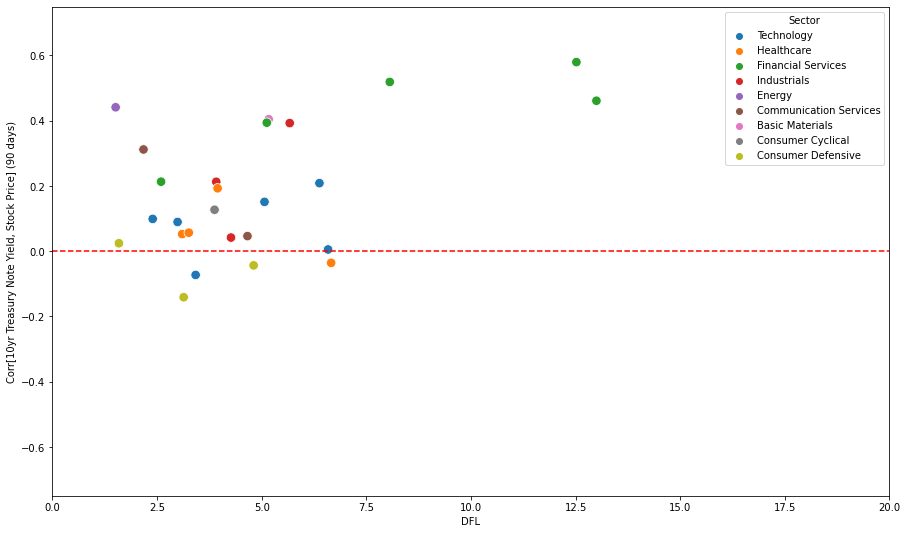

In [67]:
#DFL
plot_data = company_financial_info#[company_financial_info['Sector'] == 'Industrials']

plt.figure(figsize = (15, 9))
plt.xlim(0, 20)
plt.ylim(-0.75, 0.75)
sns.scatterplot(data = plot_data, x = 'DFL', y = 'Corr[10yr Treasury Note Yield, Stock Price] (90 days)', hue = 'Sector', s = 90)
plt.axhline(y = 0, color='r', linestyle='--')
#plt.axvline(x = 0, color='g', linestyle='--')

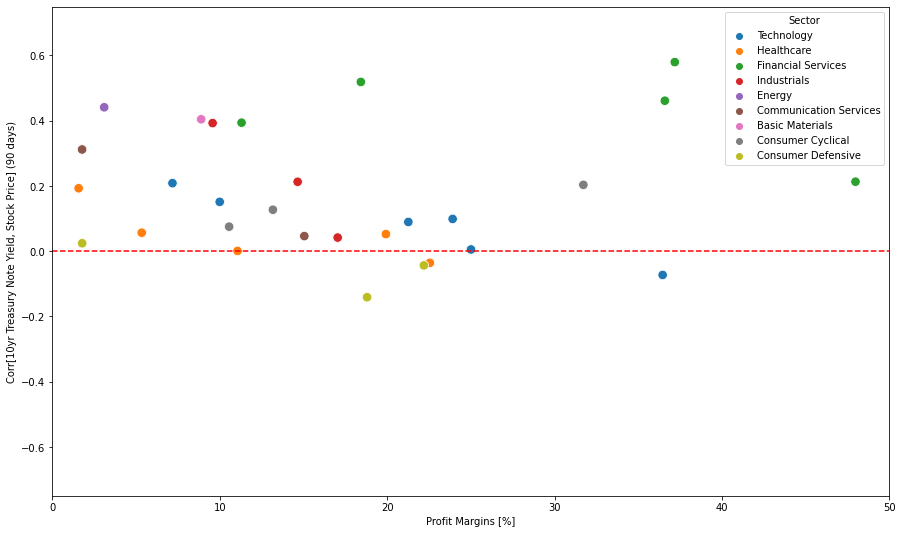

In [68]:
#Profit Margins
plot_data = company_financial_info#[company_financial_info['Sector'] == 'Industrials']

plt.figure(figsize = (15, 9))
plt.xlim(0, 50)
plt.ylim(-0.75, 0.75)
sns.scatterplot(data = plot_data, x = 'Profit Margins [%]', y = 'Corr[10yr Treasury Note Yield, Stock Price] (90 days)', hue = 'Sector', s = 90)
plt.axhline(y = 0, color='r', linestyle='--')
#plt.axvline(x = 0, color='g', linestyle='--')

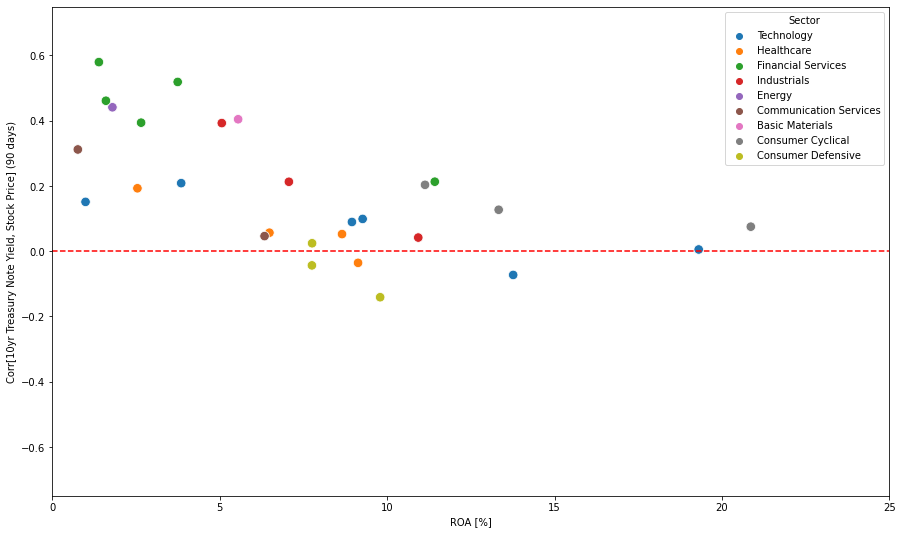

In [69]:
#ROA
plot_data = company_financial_info#[company_financial_info['Sector'] == 'Industrials']

plt.figure(figsize = (15, 9))
plt.xlim(0, 25)
plt.ylim(-0.75, 0.75)
sns.scatterplot(data = plot_data, x = 'ROA [%]', y = 'Corr[10yr Treasury Note Yield, Stock Price] (90 days)', hue = 'Sector', s = 90)
plt.axhline(y = 0, color='r', linestyle='--')
#plt.axvline(x = 0, color='g', linestyle='--')